In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [5]:
dataset = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/AIConcept/xor.txt", delimiter = ",")

trainX = dataset[:,0:2]
trainY = dataset[:,2]
print(trainX, trainY)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] [0. 1. 1. 0.]


In [6]:
def create_and_train_xor_model(optimizer, activation, learning_rate, epochs):
    # Model Building
    input_tensor = Input(shape=(2,))
    hidden_layer = Dense(2, activation=activation, use_bias=True)(input_tensor)
    output_layer = Dense(1, activation=activation, use_bias=True)(hidden_layer)

    # Model Compiling
    model = Model(input_tensor, output_layer)
    if optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    elif optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unknown optimizer")

    model.compile(loss='mean_squared_error', optimizer=opt)
    history = model.fit(trainX, trainY, epochs=epochs, batch_size=1)

    # Model Output
    output = model.predict(trainX)
    results = np.concatenate((trainX, output), axis=1)

    return results, history

In [17]:
optimizers = ['sgd', 'adam']
activations = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']

histories = []
for optimizer in optimizers:
    for activation in activations:
        results, history = create_and_train_xor_model(optimizer, activation, learning_rate=0.1, epochs=500)
        history_entry = {'optimizer': optimizer, 'activation': activation, 'results': results, 'history': history}
        histories.append(history_entry)

Streaming output truncated to the last 5000 lines.
Epoch 4/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2570
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2567
Epoch 6/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2565
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2563
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 9/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2560
Epoch 10/500
4/4 [==============================] - 0s 3ms/step - loss: 0.2558
Epoch 11/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2557
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2556
Epoch 13/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 14/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2553
Epoch 15/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2552
Epoch 1

In [21]:
optimizers = ['sgd', 'adam']
activations = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid']

def plot_training_history(history, optimizer, activation):
    import pandas as pd
    import matplotlib.pyplot as plt

    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.title(f'{optimizer} - {activation}')
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

def printOutput(histories):
  for result in histories:
    print(f'Optimizer: {result["optimizer"]}, activation: {result["activation"]}')
    print(result['results'])
    print()
    plot_training_history(result['history'], result['optimizer'], result['activation'])

Optimizer: sgd, activation: relu
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]



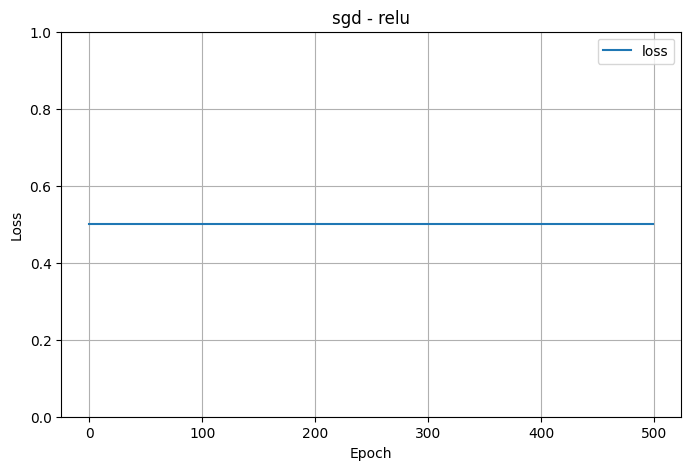

Optimizer: sgd, activation: tanh
[[0.         0.         0.00200337]
 [0.         1.         0.9638117 ]
 [1.         0.         0.96432865]
 [1.         1.         0.00440851]]



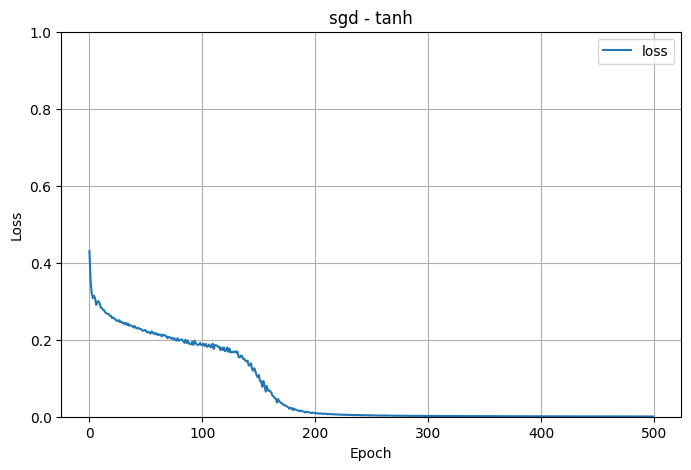

Optimizer: sgd, activation: sigmoid
[[0.         0.         0.43934363]
 [0.         1.         0.50003415]
 [1.         0.         0.56137669]
 [1.         1.         0.54628021]]



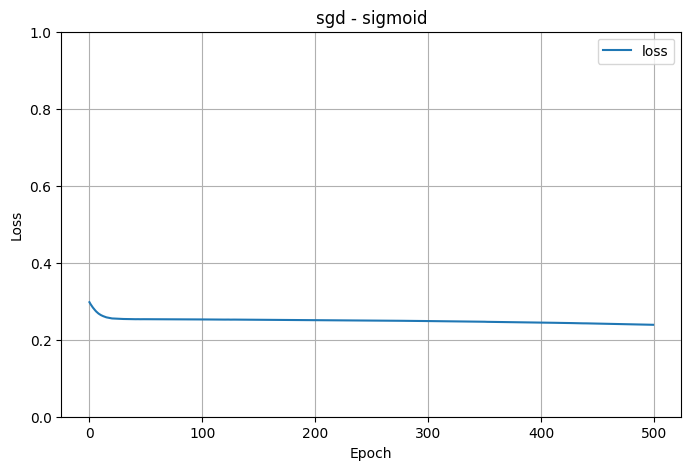

Optimizer: sgd, activation: hard_sigmoid
[[0.         0.         0.47006077]
 [0.         1.         0.49731854]
 [1.         0.         0.50155932]
 [1.         1.         0.52881706]]



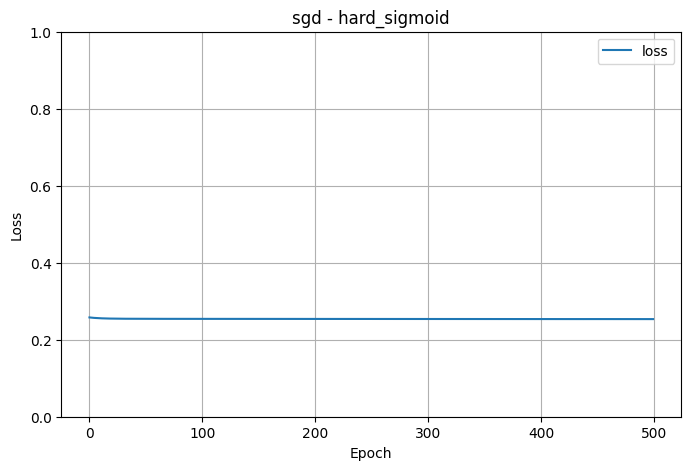

Optimizer: adam, activation: relu
[[0. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]



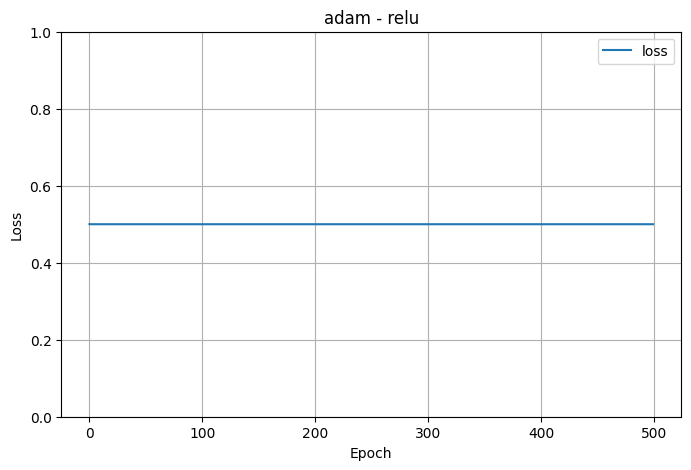

Optimizer: adam, activation: tanh
[[ 0.00000000e+00  0.00000000e+00 -2.64495611e-04]
 [ 0.00000000e+00  1.00000000e+00  9.92684066e-01]
 [ 1.00000000e+00  0.00000000e+00  9.92674530e-01]
 [ 1.00000000e+00  1.00000000e+00  7.51316547e-05]]



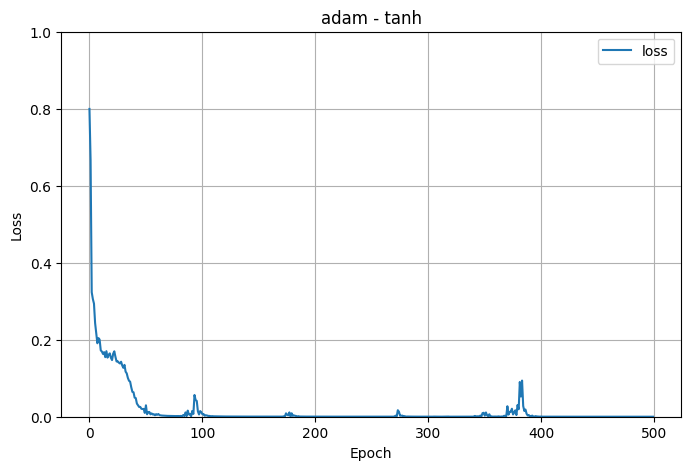

Optimizer: adam, activation: sigmoid
[[0.         0.         0.01319974]
 [0.         1.         0.9791674 ]
 [1.         0.         0.49680054]
 [1.         1.         0.49717113]]



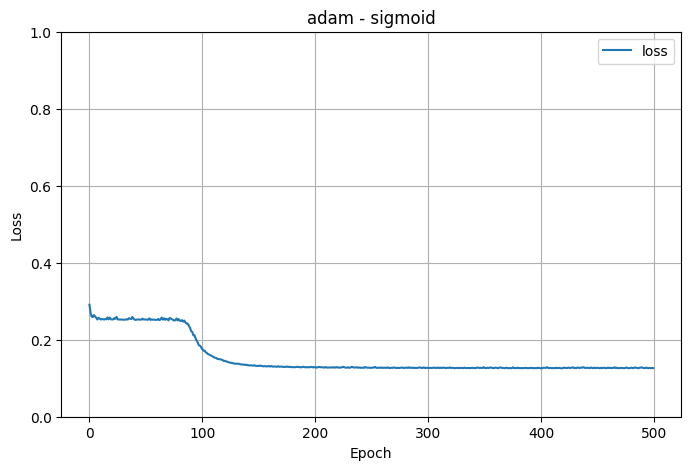

Optimizer: adam, activation: hard_sigmoid
[[0.00000000e+00 0.00000000e+00 6.25848770e-07]
 [0.00000000e+00 1.00000000e+00 9.99999642e-01]
 [1.00000000e+00 0.00000000e+00 9.99999583e-01]
 [1.00000000e+00 1.00000000e+00 6.25848770e-07]]



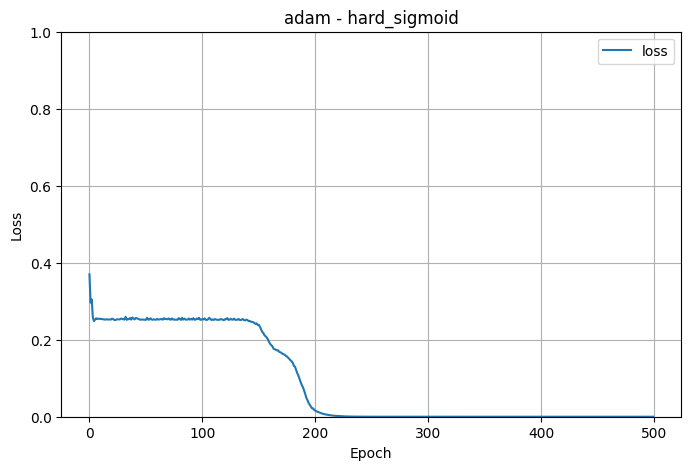

In [22]:
printOutput(histories)